In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [26]:
df = pd.read_csv('housing.csv')

In [27]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
def encode(row):
    if row == 'NEAR BAY': return 0
    elif row == '<1H OCEAN': return 1
    elif row == 'INLAND': return 2
    elif row == 'NEAR OCEAN': return 3
    else: return 4

df['ocean_proximity'] = df['ocean_proximity'].map(lambda row: encode(row))

In [29]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [30]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
df = df.dropna()

In [32]:
df = df.reset_index(drop=True)

In [33]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [34]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.464787
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.854216
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


<Axes: >

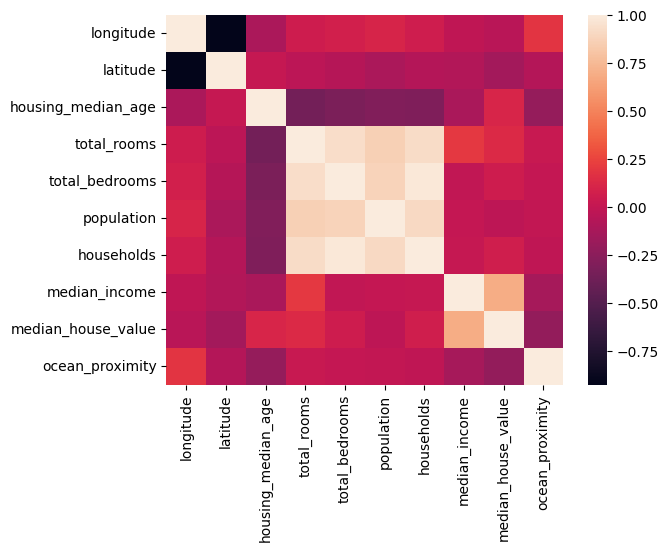

In [35]:
sns.heatmap(df.corr())

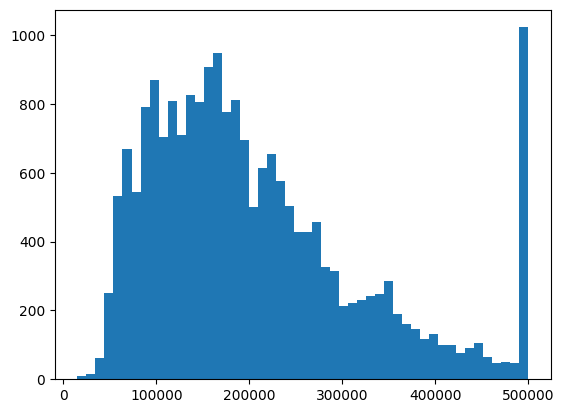

In [36]:
fig, ax = plt.subplots()
plt.hist(df['median_house_value'], bins=50);

In [37]:
df = df[(df['median_house_value'] < 450000) & (df['median_house_value'] > 85000)]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0
...,...,...,...,...,...,...,...,...,...,...
20425,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,2
20426,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,2
20427,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,2
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2


<Axes: xlabel='latitude', ylabel='longitude'>

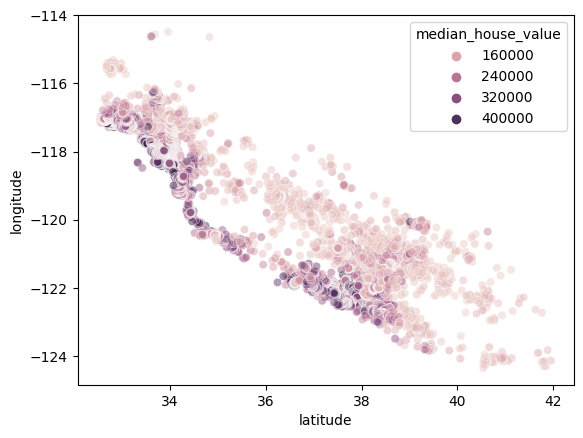

In [38]:
sns.scatterplot(data=df, x='latitude', y='longitude', hue='median_house_value', alpha=0.5)

## Making data ready for training

In [39]:
data = df.drop('median_house_value', axis=1).values
data = data.astype('float32')
labels = df['median_house_value'].values

In [40]:
def normalize(data):
    mu = data.mean(axis=0)
    sigma = data.std(axis=0)
    return (data - mu) / sigma, mu, sigma

In [41]:
X, x_mu, x_sigma = normalize(data)
Y, y_mu, y_sigma = normalize(labels)

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [43]:
model.summary()
model.compile(loss=tf.losses.MeanSquaredError(), metrics=['mean_absolute_error'],
             optimizer=tf.optimizers.Adam())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1409 (5.50 KB)
Trainable params: 1409 (5.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
hist = model.fit(X, Y, epochs=50)

Epoch 1/50
529/529 [==============================] - 1s 2ms/step - loss: 0.4666 - mean_absolute_error: 0.5161
Epoch 2/50
529/529 [==============================] - 1s 1ms/step - loss: 0.3811 - mean_absolute_error: 0.4590
Epoch 3/50
529/529 [==============================] - 1s 2ms/step - loss: 0.3638 - mean_absolute_error: 0.4462
Epoch 4/50
529/529 [==============================] - 1s 2ms/step - loss: 0.3527 - mean_absolute_error: 0.4391
Epoch 5/50
529/529 [==============================] - 1s 2ms/step - loss: 0.3440 - mean_absolute_error: 0.4318
Epoch 6/50
529/529 [==============================] - 1s 2ms/step - loss: 0.3379 - mean_absolute_error: 0.4281
Epoch 7/50
529/529 [==============================] - 1s 2ms/step - loss: 0.3355 - mean_absolute_error: 0.4249
Epoch 8/50
529/529 [==============================] - 1s 1ms/step - loss: 0.3292 - mean_absolute_error: 0.4215
Epoch 9/50
529/529 [==============================] - 1s 2ms/step - loss: 0.3262 - mean_absolute_error: 0.4188
E